# EDA & Preprocessing

In [105]:
import numpy as np
import pandas as pd

## 실습내용 요약
- GroupBy Mechanics
    - Iterating over groups
    - Selecting a Column or Subset of Columns
    - Grouping with Dicts and Series
    - Grouping with Functions
- Data Aggregation
    - Column-wise and Multiple Function Application
    - Returning Aggregated Data in ”unindexed” Form
- Group-wise Operations and Transformations
    - Transform
    - General split-apply-combine
    - Quantile and Bucket Analysis
- Pivot Tables and Cross-Tabulation

## Overview
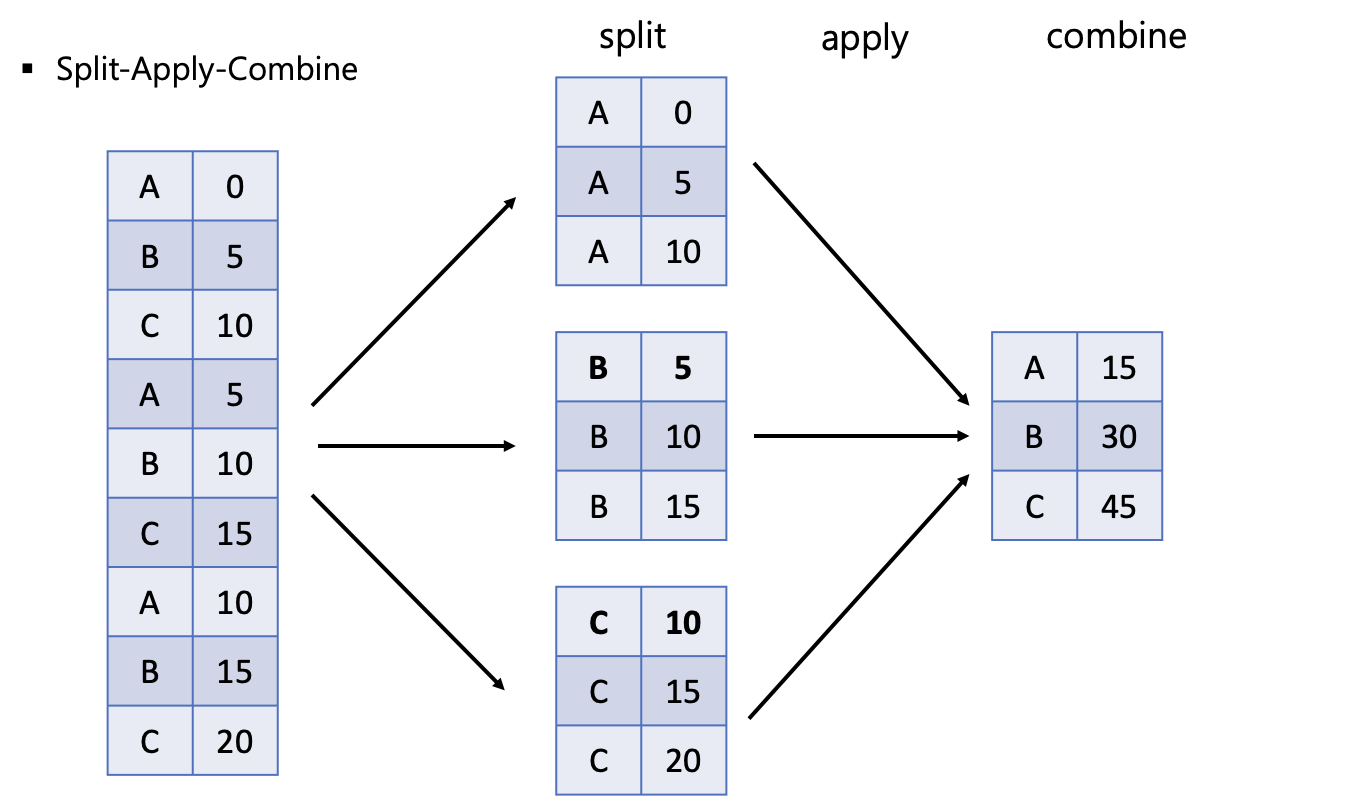


In [2]:
df = pd.DataFrame({'key1':['a','a','a','b','b'],
                  'key2':['one','one','two','two','two'],
                  'data1':[1,3,2,1,3],
                  'data2':[10,30,20,10,30]})
df

,key1,key2,data1,data2
0,a,one,1,10
1,a,one,3,30
2,a,two,2,20
3,b,two,1,10
4,b,two,3,30


##### Split
'key1'으로 그룹을 지어 groupby object인 grouped 객체를 생성하시오.

In [3]:
grouped = df.groupby('key1')
grouped

grouped 객체의 그룹 정보를 출력하시오

In [2]:
df = pd.DataFrame({'key1':['a','a','a','b','b'],
                  'key2':['one','one','two','two','two'],
                  'data1':[1,3,2,1,3],
                  'data2':[10,30,20,10,30]})
df

,key1,key2,data1,data2
0,a,one,1,10
1,a,one,3,30
2,a,two,2,20
3,b,two,1,10
4,b,two,3,30


In [4]:
grouped.groups

{'a': Int64Index([0, 1, 2], dtype='int64'),
 'b': Int64Index([3, 4], dtype='int64')}

grouped 객체를 이용해 group name이 'a'인 데이터를 출력하시오

In [5]:
grouped.get_group('a')

,key1,key2,data1,data2
0,a,one,1,10
1,a,one,3,30
2,a,two,2,20


##### Apply & Combine

key1으로 그룹짓고 그룹별 평균을 구하시오.

In [6]:
grouped = df.groupby('key1')
grouped.mean()

,data1,data2
key1,,
a,2,20
b,2,20


In [8]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,2,20
b,2,20


key1과 key2에 대해 group을 지은 뒤 각 group에 대해 data1의 평균값을 구하시오.

In [9]:
df.groupby(['key1', 'key2']).mean()

data1  data2
key1 key2              
a    one       2     20
     two       2     20
b    two       2     20

In [10]:
df.groupby(['key1', 'key2']).mean()['data1']

key1  key2
a     one     2
      two     2
b     two     2
Name: data1, dtype: int64

In [11]:
df.groupby(['key1', 'key2'])['data1'].mean()

key1  key2
a     one     2
      two     2
b     two     2
Name: data1, dtype: int64

In [14]:
df['data1'].groupby([df['key1'], df['key2']]).mean()

key1  key2
a     one     2
      two     2
b     two     2
Name: data1, dtype: int64

key1, key2로 group을 지은 뒤 group의 size를 구하시오.

In [15]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     two     2
dtype: int64

심화) 직접 그룹 규칙을 정해줄 때

In [17]:
df

,key1,key2,data1,data2
0,a,one,1,10
1,a,one,3,30
2,a,two,2,20
3,b,two,1,10
4,b,two,3,30


In [16]:
df['data1']

0    1
1    3
2    2
3    1
4    3
Name: data1, dtype: int64

In [12]:
df['data1'].groupby([df['key1'], df['key2']]).mean()

key1  key2
a     one     2
      two     2
b     two     2
Name: data1, dtype: int64

In [13]:
df.groupby([['a', 'a', 'a', 'b', 'b'], ['one', 'one', 'two', 'two', 'two']]).mean()

data1  data2
a one      2     20
  two      2     20
b two      2     20

In [18]:
df.groupby([['a1', 'a1', 'a1', 'b1', 'c1'], ['1', '1', '2', '2', '2']]).mean()

data1  data2
a1 1      2     20
   2      2     20
b1 2      1     10
c1 2      3     30

In [15]:
df.groupby([['a1', 'a1', 'b1', 'b1', 'b1'], ['1', '1', '2', '2', '2']]).mean()

,,data1,data2
a1,1,2,20
b1,2,2,20


## Iterating Over Groups
- GroupBy object는 iteration을 지원
- 각 iteration은 'group의 이름', '해당 그룹의 data'의 두 가지 정보를 담은 길이 2짜리 tuple로 구성

key1으로 group을 지은 뒤 각 group의 이름과 그 그룹의 데이터를 출력하시오.

In [20]:
list1 = [('n1', 'dat1'), ('n2', 'dat2'), ('n3', 'dat3')]
for name, data in list1:
    print(name)
    print(data)

n1
dat1
n2
dat2
n3
dat3


In [21]:
for (name, data) in df.groupby('key1'):
    print(name)
    print(data)
    print('\n')

a
  key1 key2  data1  data2
0    a  one      1     10
1    a  one      3     30
2    a  two      2     20


b
  key1 key2  data1  data2
3    b  two      1     10
4    b  two      3     30




In [22]:
list(df.groupby('key1'))

[('a',
    key1 key2  data1  data2
  0    a  one      1     10
  1    a  one      3     30
  2    a  two      2     20),
 ('b',
    key1 key2  data1  data2
  3    b  two      1     10
  4    b  two      3     30)]

In [23]:
dict(list(df.groupby('key1')))

{'a':   key1 key2  data1  data2
 0    a  one      1     10
 1    a  one      3     30
 2    a  two      2     20,
 'b':   key1 key2  data1  data2
 3    b  two      1     10
 4    b  two      3     30}

key1, key2로 group을 지은 뒤 각 group의 이름과 그 그룹의 데이터를 출력하시오.

In [25]:
for (name, data) in df.groupby(['key1', 'key2']):
    print(name)
    print(data)
    print('\n')

('a', 'one')
  key1 key2  data1  data2
0    a  one      1     10
1    a  one      3     30


('a', 'two')
  key1 key2  data1  data2
2    a  two      2     20


('b', 'two')
  key1 key2  data1  data2
3    b  two      1     10
4    b  two      3     30




In [27]:
list(df.groupby(['key1', 'key2']))

[(('a', 'one'),
    key1 key2  data1  data2
  0    a  one      1     10
  1    a  one      3     30),
 (('a', 'two'),
    key1 key2  data1  data2
  2    a  two      2     20),
 (('b', 'two'),
    key1 key2  data1  data2
  3    b  two      1     10
  4    b  two      3     30)]

심화) df를 data type에 맞게 group을 지어 출력하시오.

In [28]:
df

,key1,key2,data1,data2
0,a,one,1,10
1,a,one,3,30
2,a,two,2,20
3,b,two,1,10
4,b,two,3,30


In [34]:
grouped = df.groupby(df.dtypes, axis=1)
for (name, data) in grouped:
    print(name)
    print(data)
    print("\n")

int64
   data1  data2
0      1     10
1      3     30
2      2     20
3      1     10
4      3     30


object
  key1 key2
0    a  one
1    a  one
2    a  two
3    b  two
4    b  two




In [32]:
grouped = df.groupby([True, False, True, True], axis=1)
for (name, data) in grouped:
    print(name)
    print(data)
    print("\n")

False
  key2
0  one
1  one
2  two
3  two
4  two


True
  key1  data1  data2
0    a      1     10
1    a      3     30
2    a      2     20
3    b      1     10
4    b      3     30




## Grouping with Dicts and Series

In [37]:
people = pd.DataFrame(np.array([[-1.332610, 1.074623, 0.723642, 0.690002, 1.001543],
                      [-0.503087, -0.622274, -0.921169, -0.726213, 0.222896],
                      [0.05, np.nan, np.nan, 0.433610, 1.010737],
                      [1.824875, -0.997518, 0.850591, -0.131578, 0.912414],
                      [0.188211, 2.169461, -0.114928, 2.003697, 0.029610]]), columns=['a', 'b', 'c', 'd', 'e'])
people.index = ['Joe', 'Steve', 'Wes', 'Jim', 'Travis']
people

,a,b,c,d,e
Joe,-1.332610,1.074623,0.723642,0.690002,1.001543
Steve,-0.503087,-0.622274,-0.921169,-0.726213,0.222896
Wes,0.050000,NaN,NaN,0.433610,1.010737
Jim,1.824875,-0.997518,0.850591,-0.131578,0.912414
Travis,0.188211,2.169461,-0.114928,2.003697,0.029610


주어진 people DataFrame을 dictionary 정보로 mapping하여 그룹을 만들고, 각 그룹에 대하여 총합을 구하시오.

In [39]:
# mapping (dict)
mapping = {'a':'red','b':'red','c':'red','d':'blue','e':'blue'}
mapping

{'a': 'red', 'b': 'red', 'c': 'red', 'd': 'blue', 'e': 'blue'}

In [41]:
people.groupby(mapping, axis=1).sum()

,blue,red
Joe,1.691545,0.465655
Steve,-0.503317,-2.046530
Wes,1.444347,0.050000
Jim,0.780836,1.677948
Travis,2.033307,2.242744


In [42]:
# mapping (series)
map_series = pd.Series(mapping)
map_series

a     red
b     red
c     red
d    blue
e    blue
dtype: object

In [44]:
people.groupby(map_series, axis=1).sum()[['blue']]

,blue
Joe,1.691545
Steve,-0.503317
Wes,1.444347
Jim,0.780836
Travis,2.033307


## Grouping with Functions
이름의 글자수를 확인하고 글자수로 group을 지어주고 각 group내 column들의 합을 출력하시오.

In [45]:
people

,a,b,c,d,e
Joe,-1.332610,1.074623,0.723642,0.690002,1.001543
Steve,-0.503087,-0.622274,-0.921169,-0.726213,0.222896
Wes,0.050000,NaN,NaN,0.433610,1.010737
Jim,1.824875,-0.997518,0.850591,-0.131578,0.912414
Travis,0.188211,2.169461,-0.114928,2.003697,0.029610


In [47]:
people.groupby(len).sum()

,a,b,c,d,e
3,0.542265,0.077105,1.574233,0.992034,2.924694
5,-0.503087,-0.622274,-0.921169,-0.726213,0.222896
6,0.188211,2.169461,-0.114928,2.003697,0.029610


,a,b,c,d,e
3,0.542265,0.077105,1.574233,0.992034,2.924694
5,-0.503087,-0.622274,-0.921169,-0.726213,0.222896
6,0.188211,2.169461,-0.114928,2.003697,0.029610


## Data Aggregation
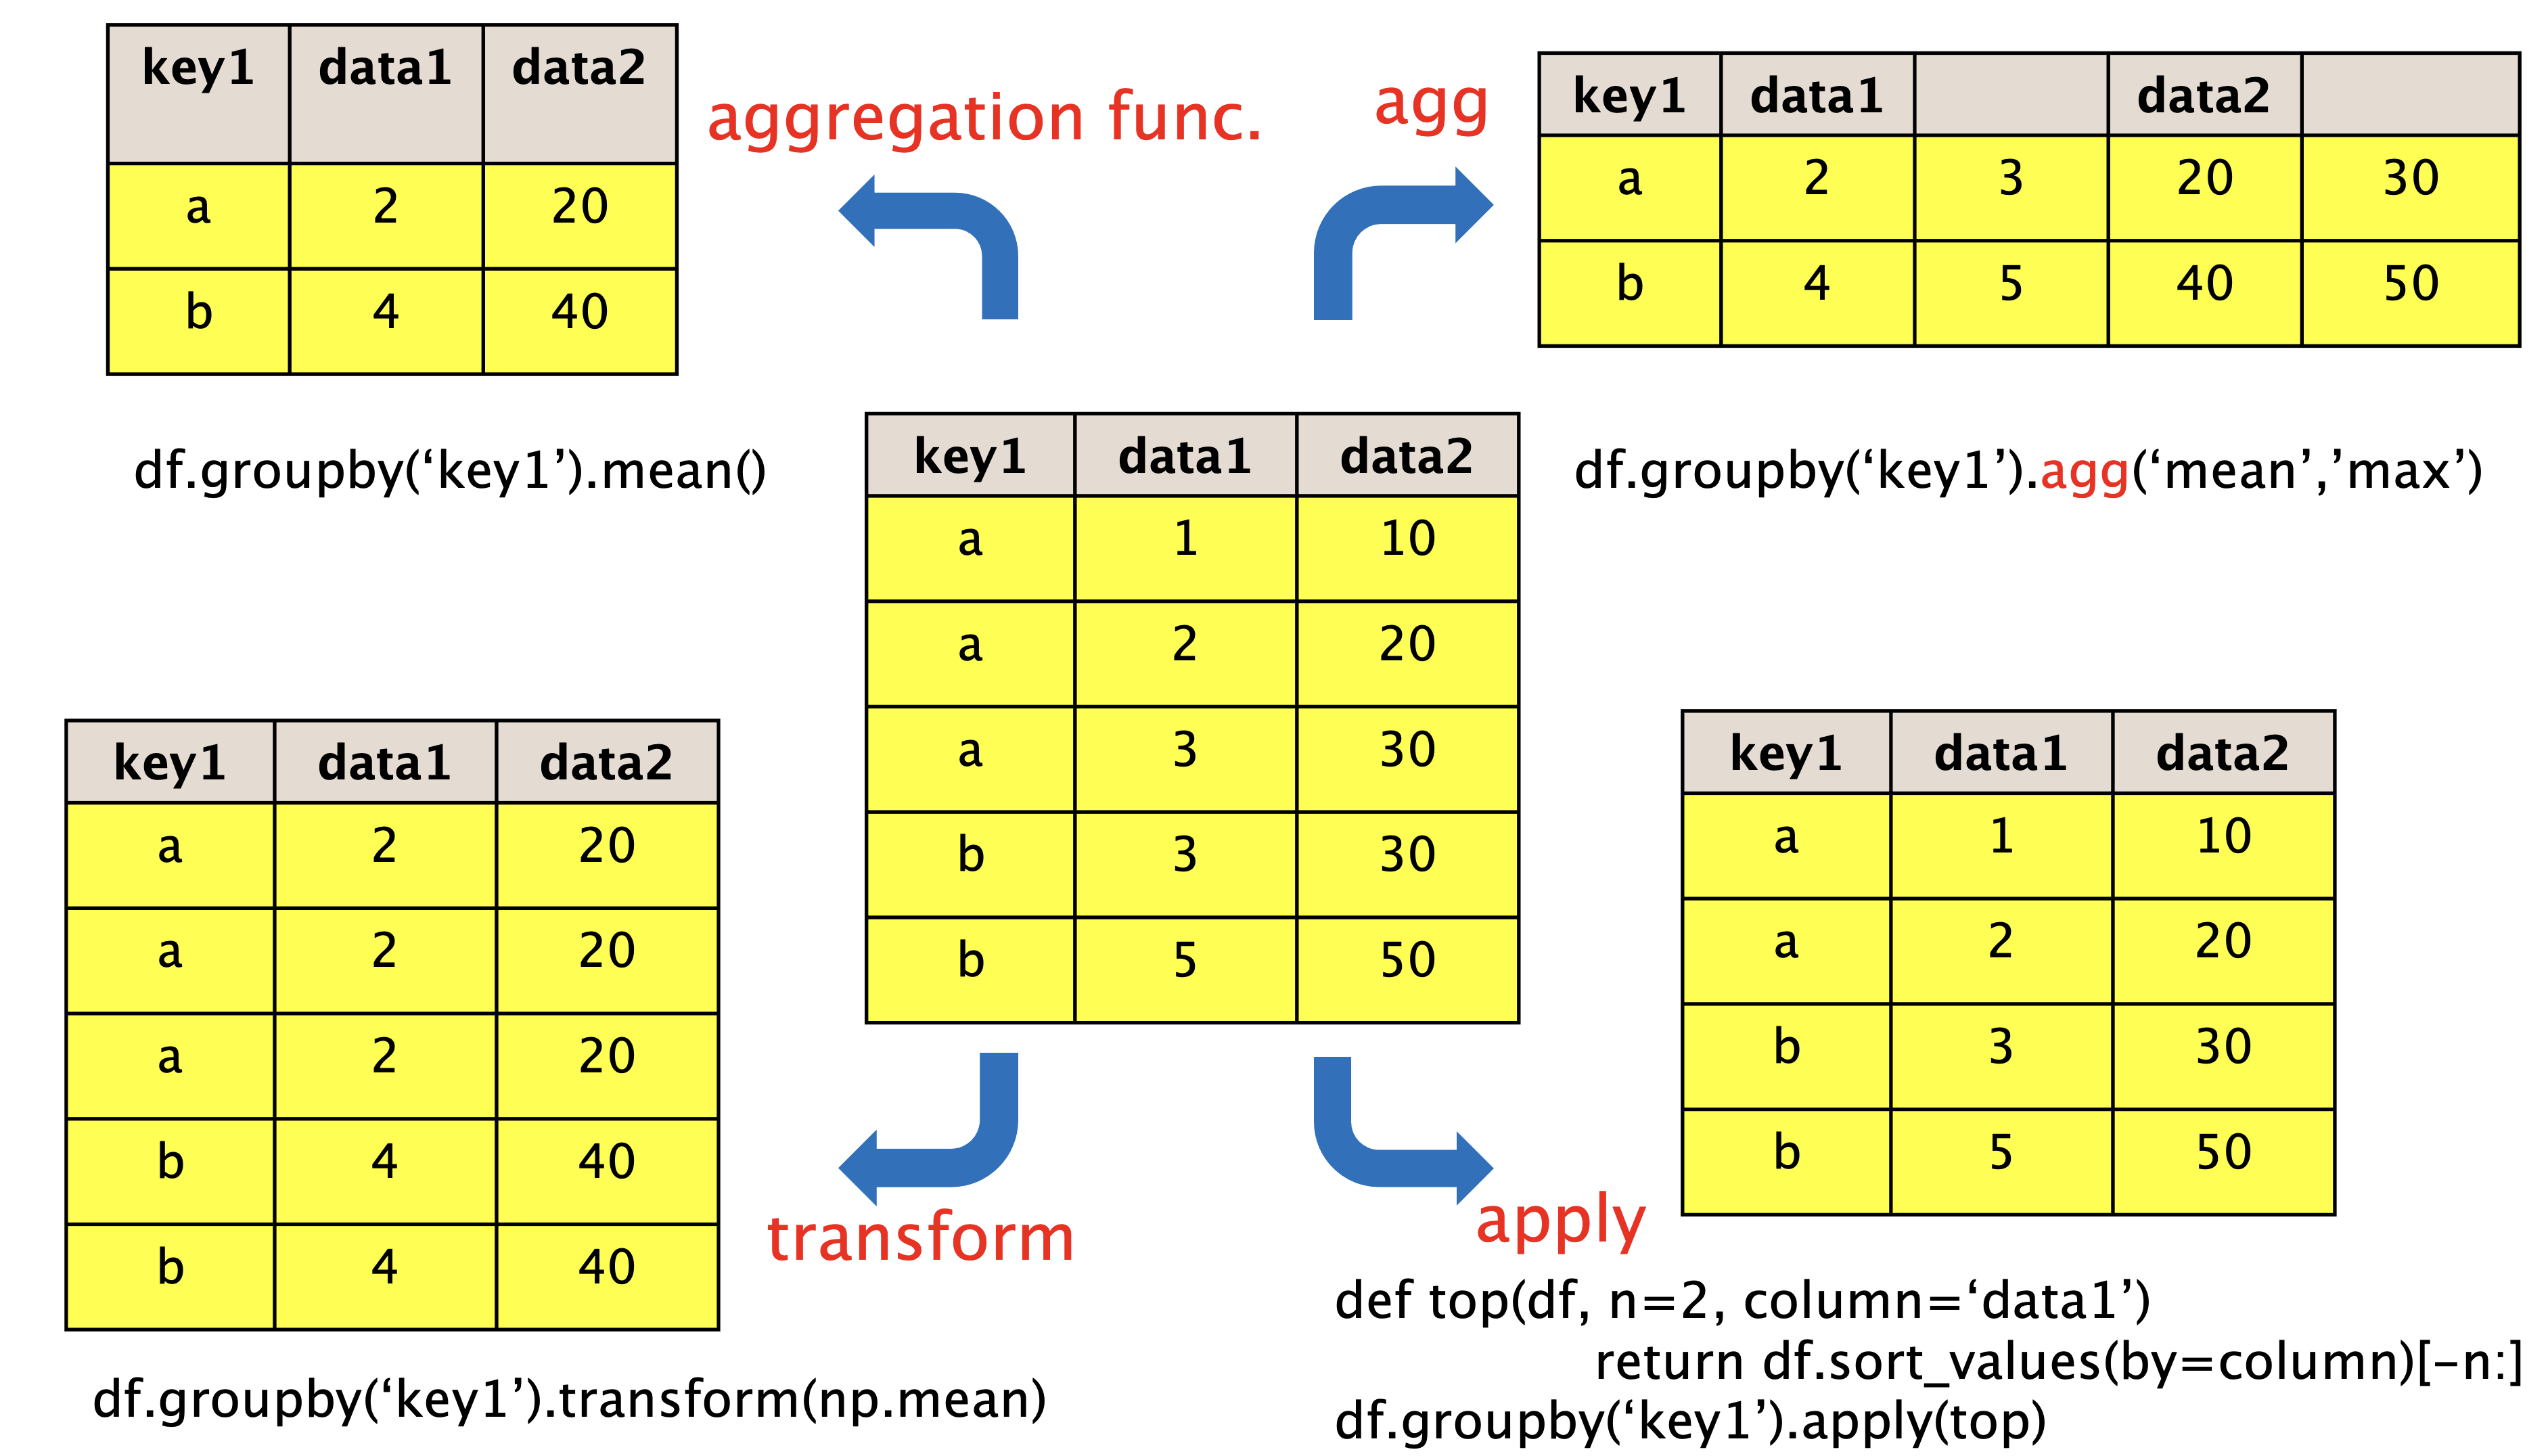

### Aggreation
- Any data transformation that produces scalar values for arrays
- Many common aggregations have optimized implementations that compute the statistics on the dataset in place.
- You can use aggregations of your own devising and additionally call any method that is also defined on the grouped object.
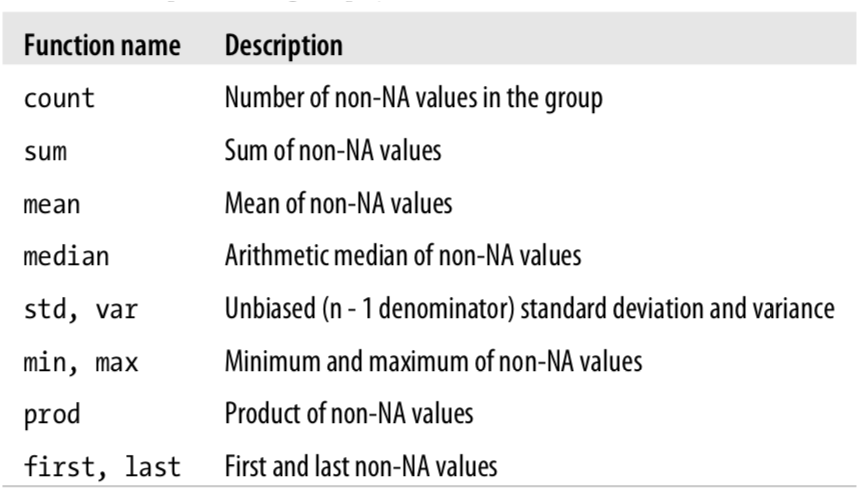

'key1'으로 그룹짓고 data1의 수를 세라

In [48]:
df.groupby('key1').count()['data1']

key1
a    3
b    2
Name: data1, dtype: int64

'key1'으로 그룹짓고 data1의 합을 구하여라

In [49]:
df.groupby('key1').sum()['data1']

key1
a    6
b    4
Name: data1, dtype: int64

'key1'으로 그룹짓고 data1의 평균을 구하여라

In [50]:
df.groupby('key1').mean()['data1']

key1
a    2
b    2
Name: data1, dtype: int64

key1으로 group을 지은 뒤 각 group에 대해 전반적인 통계를 출력해라

In [52]:
df.groupby('key1')['data1'].describe()

,count,mean,std,min,25%,50%,75%,max
key1,,,,,,,,
a,3.0,2.0,1.000000,1.0,1.5,2.0,2.5,3.0
b,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


### Agg
groupby object인 grouped 객체에 agg 함수를 이용하여 그룹별 평균을 구해라

In [53]:
grouped = df.groupby('key1')
grouped.agg('mean')

,data1,data2
key1,,
a,2,20
b,2,20


In [54]:
grouped.agg(np.mean)

,data1,data2
key1,,
a,2,20
b,2,20


groupby object인 grouped 객체에 agg 함수를 이용하여 그룹별 데이터 개수를 구해라

In [52]:
grouped.agg('count')

,key2,data1,data2
key1,,,
a,3,3,3
b,2,2,2


groupby object인 grouped 객체에 agg 함수를 이용하여 그룹별 최대와 최소의 차이를 구하시오.

In [56]:
df

,key1,key2,data1,data2
0,a,one,1,10
1,a,one,3,30
2,a,two,2,20
3,b,two,1,10
4,b,two,3,30


In [55]:
def max_min(x):
    return x.max() - x.min()

grouped.agg(max_min)

,data1,data2
key1,,
a,2,20
b,2,20


In [57]:
grouped.agg(lambda x: x.max()-x.min())

,data1,data2
key1,,
a,2,20
b,2,20


#### Column-wise and Multiple Function Application
tips.csv를 DataFrame 형태로 불러오시오.

In [61]:
tips = pd.read_csv("./data/tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


DataFrame에 total_bill 대비 tip의 비율을 구해 새로운 column 'tip_pct'에 추가하시오.

In [62]:
tips['tip_pct'] = tips.tip / tips.total_bill
tips[:6]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


sex와 smoker로 group을 지은 뒤 , 해당 group 내 tip_pct의 평균값을 출력하시오.

In [64]:
tips.groupby(['sex', 'smoker'])['tip_pct'].mean()

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

grouped_pct에 대해 mean, std, min, max, min-max 값을 각 그룹별로 구하시오.

In [68]:
def peak_to_peak(x):
    return x.max()-x.min()
    
grouped_pct = tips.groupby(['sex', 'smoker'])['tip_pct']
grouped_pct.agg(['mean', 'std', 'min', 'max', peak_to_peak])

mean       std       min       max  peak_to_peak
sex    smoker                                                      
Female No      0.156921  0.036421  0.056797  0.252672      0.195876
       Yes     0.182150  0.071595  0.056433  0.416667      0.360233
Male   No      0.160669  0.041849  0.071804  0.291990      0.220186
       Yes     0.152771  0.090588  0.035638  0.710345      0.674707

In [70]:
tips.groupby(['sex', 'smoker']).agg(['mean', 'std', 'min', 'max', peak_to_peak])

total_bill                                           tip  \
                    mean       std   min    max peak_to_peak      mean   
sex    smoker                                                            
Female No      18.105185  7.286455  7.25  35.83        28.58  2.773519   
       Yes     17.977879  9.189751  3.07  44.30        41.23  2.931515   
Male   No      19.791237  8.726566  7.51  48.33        40.82  3.113402   
       Yes     22.284500  9.911845  7.25  50.81        43.56  3.051167   

                                                      size                    \
                    std   min   max peak_to_peak      mean       std min max   
sex    smoker                                                                  
Female No      1.128425  1.00   5.2         4.20  2.592593  1.073146   1   6   
       Yes     1.219916  1.00   6.5         5.50  2.242424  0.613917   1   4   
Male   No      1.489559  1.25   9.0         7.75  2.711340  0.989094   2   6   
       Yes     1.500120  1.00  10.0         9.00  2.500000  0.892530   1   5   

                             tip_pct                                \
              peak_to_peak      mean       std       min       max   
sex    smoker                                                        
Female No                5  0.156921  0.036421  0.056797  0.252672   
       Yes               3  0.182150  0.071595  0.056433  0.416667   
Male   No                4  0.160669  0.041849  0.071804  0.291990   
       Yes               4  0.152771  0.090588  0.035638  0.710345   

                            
              peak_to_peak  
sex    smoker               
Female No         0.195876  
       Yes        0.360233  
Male   No         0.220186  
       Yes        0.674707

grouped에 대해 각 그룹의 tip 최대값과 size의 총합을 구하시오.

In [71]:
grouped = tips.groupby(['sex', 'smoker'])
grouped.agg({'tip':np.max, 'size':'sum'})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [72]:
grouped.agg({'tip':'max', 'size':'sum'})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

### Returning Aggregated Data in "unindexed" Form
DataFrame tips에 대해 sex와 smoker로 group을 지은 뒤, 각 column에 대해 mean을 구하시오.
- 1) 위 문제의 결과를 출력하시오.
- 2) group 기준이 index가 되지 않고, column으로 정보가 표현되도록 하시오. (as_index=False 사용)

In [73]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [74]:
# 1) 
tips.groupby(['sex','smoker']).mean()

total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771

In [75]:
# 2) 
tips.groupby(['sex','smoker'], as_index=False).mean()

,sex,smoker,total_bill,tip,size,tip_pct
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


## Group-wise Operations and Transformations
### Transform
DataFrame people를 key에 맞게 group을 지은 뒤 각 그룹 내 column들의 평균을 구하시오.

In [76]:
people = pd.DataFrame(np.array([[-1.332610, 1.074623, 0.723642, 0.690002, 1.001543],
                      [-0.503087, -0.622274, -0.921169, -0.726213, 0.222896],
                      [0.05, np.nan, np.nan, 0.433610, 1.010737],
                      [1.824875, -0.997518, 0.850591, -0.131578, 0.912414],
                      [0.188211, 2.169461, -0.114928, 2.003697, 0.029610]]), columns=['a', 'b', 'c', 'd', 'e'])
people.index = ['Joe', 'Steve', 'Wes', 'Jim', 'Travis']
people

,a,b,c,d,e
Joe,-1.332610,1.074623,0.723642,0.690002,1.001543
Steve,-0.503087,-0.622274,-0.921169,-0.726213,0.222896
Wes,0.050000,NaN,NaN,0.433610,1.010737
Jim,1.824875,-0.997518,0.850591,-0.131578,0.912414
Travis,0.188211,2.169461,-0.114928,2.003697,0.029610


In [77]:
key = ['one', 'one', 'one', 'two', 'two']

In [78]:
people.groupby(key).mean()

,a,b,c,d,e
one,-0.595232,0.226175,-0.098764,0.132466,0.745059
two,1.006543,0.585972,0.367831,0.936059,0.471012


key로 group을 지은 뒤 각 group의 평균에 해당하는 값을 기존 DataFrame의 해당 위치에 대체하시오.

In [64]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,-0.595232,0.226175,-0.098764,0.132466,0.745059
Steve,-0.595232,0.226175,-0.098764,0.132466,0.745059
Wes,-0.595232,0.226175,-0.098764,0.132466,0.745059
Jim,1.006543,0.585972,0.367831,0.936059,0.471012
Travis,1.006543,0.585972,0.367831,0.936059,0.471012


In [65]:
people.groupby(key).transform('mean')

,a,b,c,d,e
Joe,-0.595232,0.226175,-0.098764,0.132466,0.745059
Steve,-0.595232,0.226175,-0.098764,0.132466,0.745059
Wes,-0.595232,0.226175,-0.098764,0.132466,0.745059
Jim,1.006543,0.585972,0.367831,0.936059,0.471012
Travis,1.006543,0.585972,0.367831,0.936059,0.471012


### General split-apply-combine
DataFrame tips를 smoker를 기준으로 group을 지은 뒤, 각 group 내 tip_pct 값 상위 5개를 보이십시오.
- 아래 top 함수 활용

In [66]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [66]:
def top(df):
    return df.sort_values(by=column)[-n:]

In [84]:
df_no = tips.groupby('smoker').get_group('No')
df_no

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
235,10.07,1.25,Male,No,Sat,Dinner,2,0.124131
238,35.83,4.67,Female,No,Sat,Dinner,3,0.130338
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [85]:
df_no = tips.groupby('smoker').get_group('No')
df_no.sort_values(by='tip_pct', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
...,...,...,...,...,...,...,...,...
130,19.08,1.50,Male,No,Thur,Lunch,2,0.078616
146,18.64,1.36,Female,No,Thur,Lunch,3,0.072961
48,28.55,2.05,Male,No,Sun,Dinner,3,0.071804
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447


In [86]:
df_no = tips.groupby('smoker').get_group('No')
df_no.sort_values(by='tip_pct', ascending=False)[:5]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746


In [87]:
df_yes = tips.groupby('smoker').get_group('Yes')
df_yes

,total_bill,tip,sex,smoker,day,time,size,tip_pct
56,38.01,3.00,Male,Yes,Sat,Dinner,4,0.078927
58,11.24,1.76,Male,Yes,Sat,Dinner,2,0.156584
60,20.29,3.21,Male,Yes,Sat,Dinner,2,0.158206
61,13.81,2.00,Male,Yes,Sat,Dinner,2,0.144823
62,11.02,1.98,Male,Yes,Sat,Dinner,2,0.179673
...,...,...,...,...,...,...,...,...
234,15.53,3.00,Male,Yes,Sat,Dinner,2,0.193175
236,12.60,1.00,Male,Yes,Sat,Dinner,2,0.079365
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584


In [88]:
df_yes.sort_values('tip_pct', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
...,...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
210,30.06,2.00,Male,Yes,Sat,Dinner,3,0.066534
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


In [89]:
df_yes.sort_values('tip_pct', ascending=False)[:5]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525


In [91]:
tips.groupby('smoker').apply(np.mean)

,total_bill,tip,size,tip_pct
smoker,,,,
No,19.188278,2.991854,2.668874,0.159328
Yes,20.756344,3.008710,2.408602,0.163196


In [75]:
tips.groupby('smoker').apply(top, 5, 'tip_pct')

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

DataFrame tips를 smoker와 day를 기준으로 group을 지은 뒤, 각 group 내 total_bill 상위 1개를 보이십시오.

In [92]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column, ascending=False)[:n]

In [93]:
tips.groupby(['smoker','day']).apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker day                                                                    
No     Fri  223       15.98  3.00  Female     No   Fri   Lunch     3  0.187735
            91        22.49  3.50    Male     No   Fri  Dinner     2  0.155625
            94        22.75  3.25  Female     No   Fri  Dinner     2  0.142857
            99        12.46  1.50    Male     No   Fri  Dinner     2  0.120385
       Sat  232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
            20        17.92  4.08    Male     No   Sat  Dinner     2  0.227679
            110       14.00  3.00    Male     No   Sat  Dinner     2  0.214286
            108       18.24  3.76    Male     No   Sat  Dinner     2  0.206140
            228       13.28  2.72    Male     No   Sat  Dinner     2  0.204819
       Sun  51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
            185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
            6          8.77  2.00    Male     No   Sun  Dinner     2  0.228050
            17        16.29  3.71    Male     No   Sun  Dinner     3  0.227747
            46        22.23  5.00    Male     No   Sun  Dinner     2  0.224921
       Thur 149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
            88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
            87        18.28  4.00    Male     No  Thur   Lunch     2  0.218818
            139       13.16  2.75  Female     No  Thur   Lunch     2  0.208967
            81        16.66  3.40    Male     No  Thur   Lunch     2  0.204082
Yes    Fri  93        16.32  4.30  Female    Yes   Fri  Dinner     2  0.263480
            221       13.42  3.48  Female    Yes   Fri   Lunch     2  0.259314
            222        8.58  1.92    Male    Yes   Fri   Lunch     1  0.223776
            100       11.35  2.50  Female    Yes   Fri  Dinner     2  0.220264
            226       10.09  2.00  Female    Yes   Fri   Lunch     2  0.198216
       Sat  67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
            109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
            214       28.17  6.50  Female    Yes   Sat  Dinner     3  0.230742
            63        18.29  3.76    Male    Yes   Sat  Dinner     4  0.205577
            171       15.81  3.16    Male    Yes   Sat  Dinner     2  0.199873
       Sun  172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345
            178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
            183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
            181       23.33  5.65    Male    Yes   Sun  Dinner     2  0.242177
            174       16.82  4.00    Male    Yes   Sun  Dinner     2  0.237812
       Thur 194       16.58  4.00    Male    Yes  Thur   Lunch     2  0.241255
            200       18.71  4.00    Male    Yes  Thur   Lunch     3  0.213789
            191       19.81  4.19  Female    Yes  Thur   Lunch     2  0.211509
            205       16.47  3.23  Female    Yes  Thur   Lunch     3  0.196114
            204       20.53  4.00    Male    Yes  Thur   Lunch     4  0.194837

In [94]:
tips.groupby(['smoker','day']).apply(top, n=1, column='total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

### Exercise
각 요일별 성별별 지출 대비 팁의 비율(%)의 평균을 구하라.
- 지출 대비 팁의 비율의 평균을 구하는 함수 정의
- groupby 함수를 이용하여 위에 정의한 함수를 각 그룹에 적용
- stack 또는 unstack을 이용해 dataframe 변형

In [92]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column, ascending=False)[:n]

In [98]:
def f(df):
    return (df['tip']/df.total_bill).mean()*100

df_d_s = tips.groupby(['day', 'sex']).apply(f)

In [102]:
df_d_s

day   sex   
Fri   Female    19.938840
      Male      14.338519
Sat   Female    15.647021
      Male      15.157684
Sun   Female    18.156877
      Male      16.234407
Thur  Female    15.752483
      Male      16.527649
dtype: float64

In [104]:
df_d_s.unstack()

sex,Female,Male
day,,
Fri,19.938840,14.338519
Sat,15.647021,15.157684
Sun,18.156877,16.234407
Thur,15.752483,16.527649


### Exercise
성별과 흡연 여부로 그룹핑 했을 때, 각 그룹에서 tip을 가장 많이 준 순서대로 5개씩의 전체 데이터를 보여라.
- tip을 가장 많이 준 순서대로 5개씩 보여주는 함수 정의
- groupby 함수를 이용해서 위에 정의한 함수 적용

In [107]:
def top(df):
    return df.sort_values(by='tip', ascending=False)[:5]

In [108]:
tips.groupby(["sex", "smoker"]).apply(top)

total_bill    tip     sex smoker   day    time  size  \
sex    smoker                                                             
Female No     52        34.81   5.20  Female     No   Sun  Dinner     4   
              85        34.83   5.17  Female     No  Thur   Lunch     4   
              155       29.85   5.14  Female     No   Sun  Dinner     5   
              11        35.26   5.00  Female     No   Sun  Dinner     4   
              143       27.05   5.00  Female     No  Thur   Lunch     6   
       Yes    214       28.17   6.50  Female    Yes   Sat  Dinner     3   
              197       43.11   5.00  Female    Yes  Thur   Lunch     4   
              73        25.28   5.00  Female    Yes   Sat  Dinner     2   
              93        16.32   4.30  Female    Yes   Fri  Dinner     2   
              191       19.81   4.19  Female    Yes  Thur   Lunch     2   
Male   No     212       48.33   9.00    Male     No   Sat  Dinner     4   
              23        39.42   7.58    Male     No   Sat  Dinner     4   
              59        48.27   6.73    Male     No   Sat  Dinner     4   
              141       34.30   6.70    Male     No  Thur   Lunch     6   
              47        32.40   6.00    Male     No   Sun  Dinner     4   
       Yes    170       50.81  10.00    Male    Yes   Sat  Dinner     3   
              183       23.17   6.50    Male    Yes   Sun  Dinner     4   
              181       23.33   5.65    Male    Yes   Sun  Dinner     2   
              211       25.89   5.16    Male    Yes   Sat  Dinner     4   
              172        7.25   5.15    Male    Yes   Sun  Dinner     2   

                    tip_pct  
sex    smoker                
Female No     52   0.149382  
              85   0.148435  
              155  0.172194  
              11   0.141804  
              143  0.184843  
       Yes    214  0.230742  
              197  0.115982  
              73   0.197785  
              93   0.263480  
              191  0.211509  
Male   No     212  0.186220  
              23   0.192288  
              59   0.139424  
              141  0.195335  
              47   0.185185  
       Yes    170  0.196812  
              183  0.280535  
              181  0.242177  
              211  0.199305  
              172  0.710345

total_bill    tip     sex smoker   day    time  size  \
sex    smoker                                                             
Female No     52        34.81   5.20  Female     No   Sun  Dinner     4   
              85        34.83   5.17  Female     No  Thur   Lunch     4   
              155       29.85   5.14  Female     No   Sun  Dinner     5   
              11        35.26   5.00  Female     No   Sun  Dinner     4   
              143       27.05   5.00  Female     No  Thur   Lunch     6   
       Yes    214       28.17   6.50  Female    Yes   Sat  Dinner     3   
              197       43.11   5.00  Female    Yes  Thur   Lunch     4   
              73        25.28   5.00  Female    Yes   Sat  Dinner     2   
              93        16.32   4.30  Female    Yes   Fri  Dinner     2   
              191       19.81   4.19  Female    Yes  Thur   Lunch     2   
Male   No     212       48.33   9.00    Male     No   Sat  Dinner     4   
              23        39.42   7.58    Male     No   Sat  Dinner     4   
              59        48.27   6.73    Male     No   Sat  Dinner     4   
              141       34.30   6.70    Male     No  Thur   Lunch     6   
              47        32.40   6.00    Male     No   Sun  Dinner     4   
       Yes    170       50.81  10.00    Male    Yes   Sat  Dinner     3   
              183       23.17   6.50    Male    Yes   Sun  Dinner     4   
              181       23.33   5.65    Male    Yes   Sun  Dinner     2   
              211       25.89   5.16    Male    Yes   Sat  Dinner     4   
              172        7.25   5.15    Male    Yes   Sun  Dinner     2   

                    tip_pct  
sex    smoker                
Female No     52   0.149382  
              85   0.148435  
              155  0.172194  
              11   0.141804  
              143  0.184843  
       Yes    214  0.230742  
              197  0.115982  
              73   0.197785  
              93   0.263480  
              191  0.211509  
Male   No     212  0.186220  
              23   0.192288  
              59   0.139424  
              141  0.195335  
              47   0.185185  
       Yes    170  0.196812  
              183  0.280535  
              181  0.242177  
              211  0.199305  
              172  0.710345

### Quantile and Bucket Analysis
아래 주어진 DataFrame을 활용하여 data1의 범위를 4개로 나누고, 각 값이 어느 범주에 속하는지 보이시오.

In [109]:
frame = pd.DataFrame({'data1':np.random.randn(1000),
                  'data2':np.random.randn(1000)})
frame

,data1,data2
0,1.924532,0.092408
1,0.194126,-0.871244
2,-2.301449,1.146152
3,0.920033,-0.839446
4,-2.005740,-0.017046
...,...,...
995,0.063150,-2.640208
996,0.822498,2.045004
997,-0.852200,2.394974
998,-0.420050,-1.272195


In [110]:
factor = pd.cut(frame.data1, 4)
factor

0        (1.512, 3.239]
1       (-0.215, 1.512]
2      (-3.677, -1.943]
3       (-0.215, 1.512]
4      (-3.677, -1.943]
             ...       
995     (-0.215, 1.512]
996     (-0.215, 1.512]
997    (-1.943, -0.215]
998    (-1.943, -0.215]
999     (-0.215, 1.512]
Name: data1, Length: 1000, dtype: category
Categories (4, interval[float64]): [(-3.677, -1.943] < (-1.943, -0.215] < (-0.215, 1.512] < (1.512, 3.239]]

DataFrame frame을 활용하여 data2를 data1을 4개의 범주로 나눈 factor를 통해 group 지은 뒤, 4개의 group에 대해 기초 통계값을 보이시오.
- 아래 get_stats 함수를 활용

In [112]:
frame['data2'].groupby(factor).min()

data1
(-3.677, -1.943]   -0.218987
(-1.943, -0.215]    0.048603
(-0.215, 1.512]    -0.041988
(1.512, 3.239]     -0.032676
Name: data2, dtype: float64

In [113]:
def get_stats(group):
    return {'min':group.min(), 'max':group.max(), 'count':group.count(), 'mean':group.mean()}

In [116]:
a = frame['data2'].groupby(factor).apply(get_stats).unstack()

In [119]:
a

,min,max,count,mean
data1,,,,
"(-3.677, -1.943]",-1.884110,1.501987,29.0,-0.218987
"(-1.943, -0.215]",-3.004063,3.805425,370.0,0.048603
"(-0.215, 1.512]",-3.163325,3.078598,541.0,-0.041988
"(1.512, 3.239]",-2.652744,1.836028,60.0,-0.032676


In [120]:
a.stack()

data1                  
(-3.677, -1.943]  min       -1.884110
                  max        1.501987
                  count     29.000000
                  mean      -0.218987
(-1.943, -0.215]  min       -3.004063
                  max        3.805425
                  count    370.000000
                  mean       0.048603
(-0.215, 1.512]   min       -3.163325
                  max        3.078598
                  count    541.000000
                  mean      -0.041988
(1.512, 3.239]    min       -2.652744
                  max        1.836028
                  count     60.000000
                  mean      -0.032676
dtype: float64

In [119]:
a

,min,max,count,mean
data1,,,,
"(-3.677, -1.943]",-1.884110,1.501987,29.0,-0.218987
"(-1.943, -0.215]",-3.004063,3.805425,370.0,0.048603
"(-0.215, 1.512]",-3.163325,3.078598,541.0,-0.041988
"(1.512, 3.239]",-2.652744,1.836028,60.0,-0.032676


In [118]:
a.unstack()

       data1           
min    (-3.677, -1.943]     -1.884110
       (-1.943, -0.215]     -3.004063
       (-0.215, 1.512]      -3.163325
       (1.512, 3.239]       -2.652744
max    (-3.677, -1.943]      1.501987
       (-1.943, -0.215]      3.805425
       (-0.215, 1.512]       3.078598
       (1.512, 3.239]        1.836028
count  (-3.677, -1.943]     29.000000
       (-1.943, -0.215]    370.000000
       (-0.215, 1.512]     541.000000
       (1.512, 3.239]       60.000000
mean   (-3.677, -1.943]     -0.218987
       (-1.943, -0.215]      0.048603
       (-0.215, 1.512]      -0.041988
       (1.512, 3.239]       -0.032676
dtype: float64

In [85]:
grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.016, -1.441]",-2.456701,2.022797,81.0,-0.005480
"(-1.441, 0.128]",-2.815827,3.454073,464.0,-0.005707
"(0.128, 1.696]",-2.767391,2.614970,414.0,-0.026648
"(1.696, 3.265]",-2.146567,1.489902,41.0,0.070023


In [121]:
grouped = frame.data2.groupby(factor)
grouped.agg(['min', 'max', 'count', 'mean'])

,min,max,count,mean
data1,,,,
"(-3.677, -1.943]",-1.884110,1.501987,29,-0.218987
"(-1.943, -0.215]",-3.004063,3.805425,370,0.048603
"(-0.215, 1.512]",-3.163325,3.078598,541,-0.041988
"(1.512, 3.239]",-2.652744,1.836028,60,-0.032676


### Pivot Tables and Cross-Tabulation
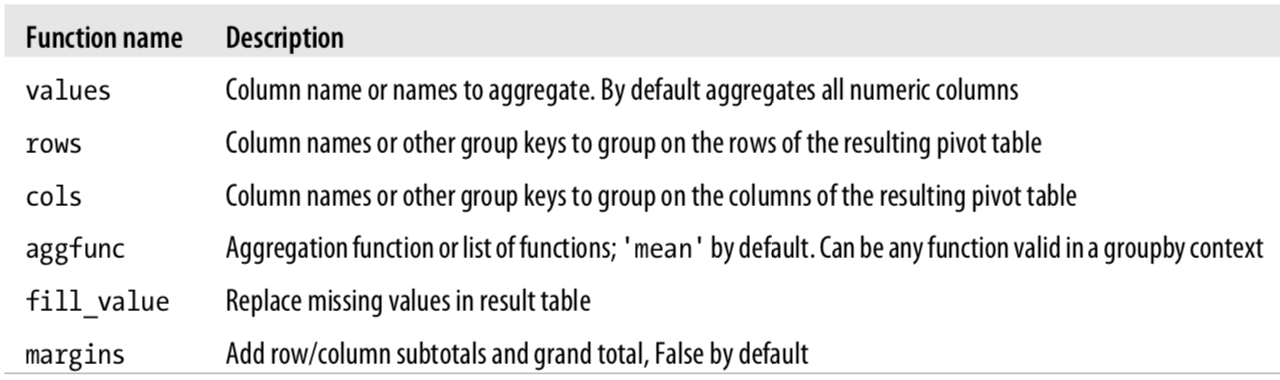

DataFrame tips를 활용하여 sex와 smoker를 index로 하는 pivot table을 만드시오.

In [127]:
tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [126]:
tips.pivot_table(index=["sex", "smoker"], aggfunc='max')

day  size   time   tip   tip_pct  total_bill
sex    smoker                                               
Female No      Thur     6  Lunch   5.2  0.252672       35.83
       Yes     Thur     4  Lunch   6.5  0.416667       44.30
Male   No      Thur     6  Lunch   9.0  0.291990       48.33
       Yes     Thur     5  Lunch  10.0  0.710345       50.81

In [38]:
tips.pivot_table(index=['sex', 'smoker'])

size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

DataFrame tips를 활용하여 sex와 day를 index로 하고, smoker를 column으로 가져 흡연자의 흡연 유무에 따른 tip_pct와 size를 보이는 pivot table을 만드시오.

In [128]:
tips.pivot_table(values=['tip_pct', 'size'], index=['sex', 'day'],
                columns='smoker', aggfunc='mean')

size             tip_pct          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   2.500000  2.000000  0.165296  0.209129
       Sat   2.307692  2.200000  0.147993  0.163817
       Sun   3.071429  2.500000  0.165710  0.237075
       Thur  2.480000  2.428571  0.155971  0.163073
Male   Fri   2.000000  2.125000  0.138005  0.144730
       Sat   2.656250  2.629630  0.162132  0.139067
       Sun   2.883721  2.600000  0.158291  0.173964
       Thur  2.500000  2.300000  0.165706  0.164417

위 pivot table에 smoker의 흡연 유무와 상관 없는 (No, Yes 모두 합쳐진) column을 추가하시오.

In [92]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   2.500000  2.000000  2.111111  0.165296  0.209129  0.199388
       Sat   2.307692  2.200000  2.250000  0.147993  0.163817  0.156470
       Sun   3.071429  2.500000  2.944444  0.165710  0.237075  0.181569
       Thur  2.480000  2.428571  2.468750  0.155971  0.163073  0.157525
Male   Fri   2.000000  2.125000  2.100000  0.138005  0.144730  0.143385
       Sat   2.656250  2.629630  2.644068  0.162132  0.139067  0.151577
       Sun   2.883721  2.600000  2.810345  0.158291  0.173964  0.162344
       Thur  2.500000  2.300000  2.433333  0.165706  0.164417  0.165276
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [130]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                columns='smoker', margins=True)[['tip_pct', 'size']]

tip_pct                          size                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   0.165296  0.209129  0.199388  2.500000  2.000000  2.111111
       Sat   0.147993  0.163817  0.156470  2.307692  2.200000  2.250000
       Sun   0.165710  0.237075  0.181569  3.071429  2.500000  2.944444
       Thur  0.155971  0.163073  0.157525  2.480000  2.428571  2.468750
Male   Fri   0.138005  0.144730  0.143385  2.000000  2.125000  2.100000
       Sat   0.162132  0.139067  0.151577  2.656250  2.629630  2.644068
       Sun   0.158291  0.173964  0.162344  2.883721  2.600000  2.810345
       Thur  0.165706  0.164417  0.165276  2.500000  2.300000  2.433333
All          0.159328  0.163196  0.160803  2.668874  2.408602  2.569672

DataFrame tips를 활용하여 sex와 smoker를 index로 하고, day를 column으로 가져 각 group 별로 요일에 따른 tip_pct 값의 총합을 구하시오.

In [93]:
tips.pivot_table(values='tip_pct', index=['sex', 'smoker'], columns='day', aggfunc='sum')

day                 Fri       Sat       Sun      Thur
sex    smoker                                        
Female No      0.330592  1.923915  2.319939  3.899287
       Yes     1.463904  2.457251  0.948299  1.141508
Male   No      0.276010  5.188230  6.806499  3.314127
       Yes     1.157842  3.754804  2.609457  1.644168

### Cross-Tabulations: Crosstab

Crosstab을 활용하여 DataFrame tips에서 time과 day를 index로 하고, smoker의 흡연 유무(No, Yes, All포함)에 따라 각 group별 몇 명씩 있는지 구하시오.

In [42]:
pd.crosstab(index=[tips.time, tips.day], columns=tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [95]:
pd.crosstab([tips.sex, tips.smoker], tips.day, values=tips.tip_pct, margins=True, aggfunc='sum')

day                 Fri        Sat        Sun      Thur        All
sex    smoker                                                     
Female No      0.330592   1.923915   2.319939  3.899287   8.473732
       Yes     1.463904   2.457251   0.948299  1.141508   6.010962
Male   No      0.276010   5.188230   6.806499  3.314127  15.584865
       Yes     1.157842   3.754804   2.609457  1.644168   9.166271
All            3.228348  13.324199  12.684194  9.999089  39.235830